# <center><font color="red"><h1> Projet DM </h1></font></center>
<br>
 <center><font color="black"> Réalisé par Youssef Ben Romdhane </font></center>
  <center><font color="black"> 2BD1 </font></center>

# Introduction 
Dans un marché automobile en constante évolution, la compréhension des préférences des consommateurs et des dynamiques concurrentielles entre les marques revêt une importance cruciale pour les fabricants et les vendeurs. Le jeu de données "car_prices" constitue une mine d'informations précieuses permettant d'explorer en profondeur ces aspects fondamentaux du marché automobile contemporain.

# Objectif

#### objectif principal de cette analyse :
est de comparer la concurrence entre les différentes marques de voitures et de comprendre les préférences des consommateurs en matière de véhicules et de marques. En examinant de près les données fournies par le jeu de données, nous cherchons à dégager des insights significatifs sur les choix des consommateurs, ainsi que sur les tendances et les dynamiques concurrentielles qui régissent le marché automobile.

#### Objectif Commercial : 
on va faire une prediction du "SellingPrice" en fonction de quelques paramètres...


# Informations sur la Dataset pour le projet 

year (année) : L'année de fabrication du véhicule.

make (marque) : La marque du véhicule, par exemple, Kia, Toyota, etc.

model (modèle) : Le modèle spécifique du véhicule, par exemple, Sorento, Camry, etc.

trim (finition) : La version spécifique ou la finition du modèle, par exemple, LX, LE, etc.

body (type de carrosserie) : Le type de carrosserie du véhicule, par exemple, SUV, berline, etc.

transmission (transmission) : Le type de transmission du véhicule, par exemple, automatique, manuelle, etc.

vin (numéro d'identification du véhicule) : Le numéro d'identification unique attribué au véhicule.

state (état) : L'état où la transaction du véhicule a eu lieu.

condition (état du véhicule) : L'état général du véhicule, évalué sur une échelle de notation, par exemple, de 1 à 5.

odometer (kilométrage) : Le nombre de kilomètres parcourus par le véhicule.

color (couleur) : La couleur extérieure du véhicule.

interior (intérieur) : La couleur ou les caractéristiques de l'intérieur du véhicule.

seller (vendeur) : Le vendeur du véhicule, par exemple, le concessionnaire ou le propriétaire privé.

mmr (prix de gros recommandé) : Le prix de gros recommandé pour le véhicule.

sellingprice (prix de vente) : Le prix auquel le véhicule a été vendu.

saledate (date de vente) : La date à laquelle la transaction de vente du véhicule a eu lieu.


In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#lecture du dataframe
carsdf=pd.read_csv(r'C:\Users\PC\Downloads\car_prices.csv\car_prices.csv')

# Phase de nettoyage de dataframe : 
pour cela on prend quleques méthodes pour rendre la dataframe plus efficace et simple pour faire notre analyse...

In [3]:
# Supprimer les colonnes non pertinentes
colonnes_non_pertinentes = ['vin']  # Exemple de colonne non pertinente
carsdf = carsdf.drop(columns=colonnes_non_pertinentes)

In [4]:
# Supprimer les lignes contenant des valeurs NaN
print("carsdf avant suppresion des NaN Values")
print(carsdf.shape)
carsdf = carsdf.dropna()
print("carsdf après suppresion des NaN Values")
print(carsdf.shape)

carsdf avant suppresion des NaN Values
(558837, 15)
carsdf après suppresion des NaN Values
(472325, 15)


In [5]:

# Tout d'abord, convertissons toutes les chaînes de caractères de la colonne 'body' en minuscules
carsdf['body'] = carsdf['body'].str.lower()

# Définissons une fonction pour ajuster les chaînes de caractères
def ajuster_carrosserie(carrosserie):
    if 'berline' in carrosserie:
        return 'BERLINE'
    elif 'cabriolet' in carrosserie:
        return 'CABRIOLET'
    # Vous pouvez ajouter d'autres conditions pour d'autres types de carrosserie si nécessaire
    else:
        return carrosserie

# Appliquons la fonction à la colonne 'body'
carsdf['body'] = carsdf['body'].apply(ajuster_carrosserie)

# Maintenant, convertissons toutes les valeurs de la colonne 'body' en majuscules
carsdf['body'] = carsdf['body'].str.upper()

# Affichons le dataframe nettoyé
print(carsdf)


        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      SEDAN   
3       2015   Volvo                  S60           T5      SEDAN   
4       2014     BMW  6 Series Gran Coupe         650i      SEDAN   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      SEDAN   
558833  2012     Ram                 2500  Power Wagon   CREW CAB   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      SEDAN   
558836  2014    Ford                F-150          XLT  SUPERCREW   

       transmission state  condition  odometer  color interior  \
0         automatic    ca        5.0   16639.0  white    black   
1         automatic    ca        5.0   

### Interprétation : ona modifier la structure des strings dans la colonne color

#### Détermination des Outliers :



In [6]:
from scipy import stats

# Spécifier les colonnes numériques
colonnes_numeriques = ['odometer', 'mmr', 'sellingprice']

# Calculer les scores Z pour les colonnes numériques
z_scores = stats.zscore(carsdf[colonnes_numeriques])

# Calculer les valeurs absolues des scores Z
abs_z_scores = np.abs(z_scores)

# Déterminer les lignes où tous les scores Z sont inférieurs à 3
lignes_filtrees = (abs_z_scores < 3).all(axis=1)

# Filtrer le DataFrame en fonction des entrées filtrées
carsdf = carsdf[lignes_filtrees]

# Afficher le DataFrame filtré
print(carsdf.head())


   year    make     model        trim   body transmission state  condition  \
0  2015     Kia   Sorento          LX    SUV    automatic    ca        5.0   
1  2015     Kia   Sorento          LX    SUV    automatic    ca        5.0   
2  2014     BMW  3 Series  328i SULEV  SEDAN    automatic    ca       45.0   
3  2015   Volvo       S60          T5  SEDAN    automatic    ca       41.0   
5  2015  Nissan    Altima       2.5 S  SEDAN    automatic    ca        1.0   

   odometer  color interior  \
0   16639.0  white    black   
1    9393.0  white    beige   
2    1331.0   gray    black   
3   14282.0  white    black   
5    5554.0   gray    black   

                                              seller      mmr  sellingprice  \
0                            kia motors america  inc  20500.0       21500.0   
1                            kia motors america  inc  20800.0       21500.0   
2             financial services remarketing (lease)  31900.0       30000.0   
3                           

###  Interprétation :
La méthode des scores Z, également connue sous le nom de méthode de l'écart-type, est une technique courante pour détecter et gérer les valeurs aberrantes dans un ensemble de données. Elle mesure le nombre d'écart-types par rapport à la moyenne que chaque observation se situe. Une valeur Z de 3 signifie que la valeur est à trois écarts-types de la moyenne. Si les valeurs Z sont inférieures à 3 pour toutes les variables numériques d'une observation, cette observation est considérée comme non aberrante et est conservée dans le jeu de données.

En appliquant cette méthode, le code identifie et supprime les lignes où toutes les valeurs numériques sont considérées comme aberrantes selon le critère des scores Z. Cela permet de nettoyer le jeu de données des valeurs extrêmes qui pourraient fausser les analyses statistiques ou les modèles prédictifs.

In [7]:
#suppression des lignes qui ne contiennet pas une indication de couleur
# Filtrer le symbole '—' dans la colonne   'color' 
carsdf = carsdf[carsdf['color'] != '—']

# shape
print("Shape of cleaned DataFrame:", carsdf.shape)

Shape of cleaned DataFrame: (439797, 15)


In [8]:
#Nettoyage du sales date par rapport de year

# Convert the 'saledate' column to datetime format without specifying the timezone
carsdf['saledate'] = pd.to_datetime(carsdf['saledate'], utc=True)

# Filter out rows where the sale date is before the year of the car
carsdf = carsdf[carsdf['saledate'].dt.year >= carsdf['year']]

# Reset index
carsdf.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print(carsdf)

C:\Users\PC\AppData\Local\Temp\ipykernel_22796\2934313136.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  carsdf['saledate'] = pd.to_datetime(carsdf['saledate'], utc=True)


        year       make     model                       trim         body  \
0       2014        BMW  3 Series                 328i SULEV        SEDAN   
1       2015      Volvo       S60                         T5        SEDAN   
2       2014  Chevrolet     Cruze                        1LT        SEDAN   
3       2014       Audi        A4  2.0T Premium Plus quattro        SEDAN   
4       2014  Chevrolet    Camaro                         LT  CONVERTIBLE   
...      ...        ...       ...                        ...          ...   
439672  2011        BMW  5 Series                       528i        SEDAN   
439673  2012        Ram      2500                Power Wagon     CREW CAB   
439674  2012        BMW        X5                  xDrive35d          SUV   
439675  2015     Nissan    Altima                      2.5 S        SEDAN   
439676  2014       Ford     F-150                        XLT    SUPERCREW   

       transmission state  condition  odometer  color interior  \
0        

### IQR (Intervalle interquartile) :
Utilisation de la méthode quantile() pour calculer le premier quartile (Q1) et le troisième quartile (Q3) pour chaque colonne numérique. Ensuite, calculez l'IQR (Q3 - Q1). Enfin, filtrez les lignes où toute valeur numérique est inférieure à Q1 - 1.5 * IQR ou supérieure à Q3 + 1.5 * IQR.

In [9]:
# Calculer Q1, Q3 et l'IQR pour chaque colonne numérique
Q1 = carsdf[colonnes_numeriques].quantile(0.25)
Q3 = carsdf[colonnes_numeriques].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les lignes où toute valeur numérique est inférieure à Q1 - 1.5 * IQR ou supérieure à Q3 + 1.5 * IQR
carsdf = carsdf[~((carsdf[colonnes_numeriques] < (Q1 - 1.5 * IQR)) | (carsdf[colonnes_numeriques] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
# Supprimer les lignes où la valeur dans la colonne 'condition' est inférieure à 1 ou supérieure à 5
carsdf = carsdf[(carsdf['condition'] >= 1) & (carsdf['condition'] <= 5)]

# Arrondir les valeurs dans la colonne 'condition' et les convertir en entiers
carsdf['condition'] = carsdf['condition'].round().astype(int)

# Afficher les premières lignes du DataFrame après la suppression
print(carsdf.head())


    year       make     model        trim         body transmission state  \
2   2014  Chevrolet     Cruze         1LT        SEDAN    automatic    ca   
4   2014  Chevrolet    Camaro          LT  CONVERTIBLE    automatic    ca   
5   2015       Ford    Fusion          SE        SEDAN    automatic    ca   
14  2014        BMW  3 Series  328i SULEV        SEDAN    automatic    ca   
19  2015  Chevrolet    Malibu          LT        SEDAN    automatic    ca   

    condition  odometer   color interior  \
2           2   28617.0   black    black   
4           3    4809.0     red    black   
5           2    5559.0   white    beige   
14          5     111.0   black        —   
19          1    6105.0  silver    black   

                                               seller      mmr  sellingprice  \
2   enterprise vehicle exchange / tra / rental / t...  11900.0        9800.0   
4                                  d/m auto sales inc  26300.0       17500.0   
5   enterprise vehicle exchange 

In [11]:
# Convertir la colonne 'sellingprice' en type entier
carsdf['sellingprice'] = carsdf['sellingprice'].astype(int)
carsdf.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,Chevrolet,Cruze,1LT,SEDAN,automatic,ca,2,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800,2014-12-16 05:00:00+00:00
4,2014,Chevrolet,Camaro,LT,CONVERTIBLE,automatic,ca,3,4809.0,red,black,d/m auto sales inc,26300.0,17500,2015-01-19 20:00:00+00:00
5,2015,Ford,Fusion,SE,SEDAN,automatic,ca,2,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000,2015-01-13 04:00:00+00:00
14,2014,BMW,3 Series,328i SULEV,SEDAN,automatic,ca,5,111.0,black,—,financial services remarketing (lease),32200.0,30500,2015-01-14 20:30:00+00:00
19,2015,Chevrolet,Malibu,LT,SEDAN,automatic,ca,1,6105.0,silver,black,enterprise vehicle exchange / tra / rental / t...,16600.0,9800,2015-01-13 23:05:00+00:00


# Phase d'exploration des données(intro pour le projet)
dans cette phase on va utiliser des notions statistiques et des commandes simples

In [12]:
# affichage
carsdf.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,Chevrolet,Cruze,1LT,SEDAN,automatic,ca,2,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800,2014-12-16 05:00:00+00:00
4,2014,Chevrolet,Camaro,LT,CONVERTIBLE,automatic,ca,3,4809.0,red,black,d/m auto sales inc,26300.0,17500,2015-01-19 20:00:00+00:00
5,2015,Ford,Fusion,SE,SEDAN,automatic,ca,2,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000,2015-01-13 04:00:00+00:00


In [13]:
# Obtenir un résumé du DataFrame
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51897 entries, 2 to 439673
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          51897 non-null  int64              
 1   make          51897 non-null  object             
 2   model         51897 non-null  object             
 3   trim          51897 non-null  object             
 4   body          51897 non-null  object             
 5   transmission  51897 non-null  object             
 6   state         51897 non-null  object             
 7   condition     51897 non-null  int32              
 8   odometer      51897 non-null  float64            
 9   color         51897 non-null  object             
 10  interior      51897 non-null  object             
 11  seller        51897 non-null  object             
 12  mmr           51897 non-null  float64            
 13  sellingprice  51897 non-null  int32              
 14  saledate  

In [14]:
# Générer des statistiques descriptives pour les colonnes numériques
carsdf.describe()

,year,condition,odometer,mmr,sellingprice
count,51897.000000,51897.000000,51897.000000,51897.000000,51897.00000
mean,2009.974295,3.089003,63066.290807,12638.475249,11963.43621
std,4.911012,1.239165,52462.384743,7819.518479,8118.49593
min,1990.000000,1.000000,1.000000,50.000000,100.00000
25%,2007.000000,2.000000,20229.000000,5875.000000,4700.00000
50%,2012.000000,3.000000,42399.000000,12600.000000,11700.00000
75%,2014.000000,4.000000,101584.000000,18000.000000,17600.00000
max,2015.000000,5.000000,199778.000000,33500.000000,33750.00000


In [15]:
#affichage des dernières lignes du dataframe
carsdf.tail(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
439585,2002,Honda,Civic,Si,HATCHBACK,manual,ca,3,131341.0,white,black,t&s california auto inc,3000.0,3300,2015-06-19 01:00:00+00:00
439590,2013,Lexus,RX 350,Base,SUV,automatic,fl,4,26882.0,white,gray,arg inc,30100.0,33000,2015-06-18 19:30:00+00:00
439673,2012,Ram,2500,Power Wagon,CREW CAB,automatic,wa,5,54393.0,white,black,i -5 uhlmann rv,30200.0,30800,2015-07-08 02:30:00+00:00


# Phase d'analyse de concurrence entre les marques

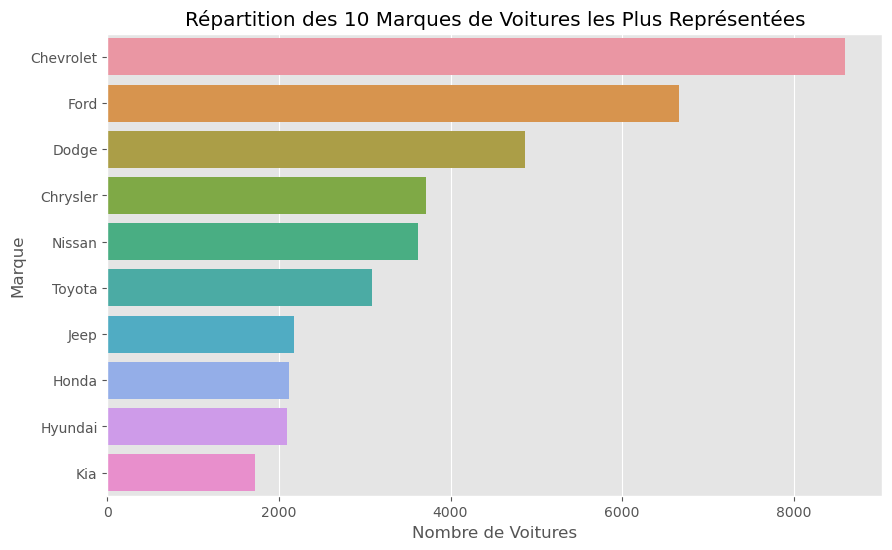

In [16]:
# Sélectionner les 10 marques les plus représentées
top_10_makes = carsdf['make'].value_counts().nlargest(10).index

# Filtrer le dataframe pour inclure uniquement les 10 marques les plus représentées
carsdf_top_10 = carsdf[carsdf['make'].isin(top_10_makes)]

# Visualiser la répartition des 10 marques de voitures les plus représentées
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=carsdf_top_10, order=carsdf_top_10['make'].value_counts().index)
plt.title('Répartition des 10 Marques de Voitures les Plus Représentées')
plt.xlabel('Nombre de Voitures')
plt.ylabel('Marque')
plt.show()


### Interprétation : Répartition des 10 Marques de Voitures les Plus Représentées

Le graphique à barres horizontal ci-dessus présente la répartition des 10 marques de voitures les plus représentées dans notre jeu de données. Ces marques sont celles qui ont le plus grand nombre de voitures enregistrées. En observant cette visualisation, nous pouvons identifier les marques dominantes sur le marché automobile, ainsi que leur relative popularité parmi les consommateurs. Il est intéressant de noter que [Chevrolet] est en tête en termes de nombre de voitures, suivi de près par [Ford]. Cette information nous donne un aperçu initial des marques les plus importantes à considérer dans notre analyse de la compétition entre les marques et des préférences des consommateurs.


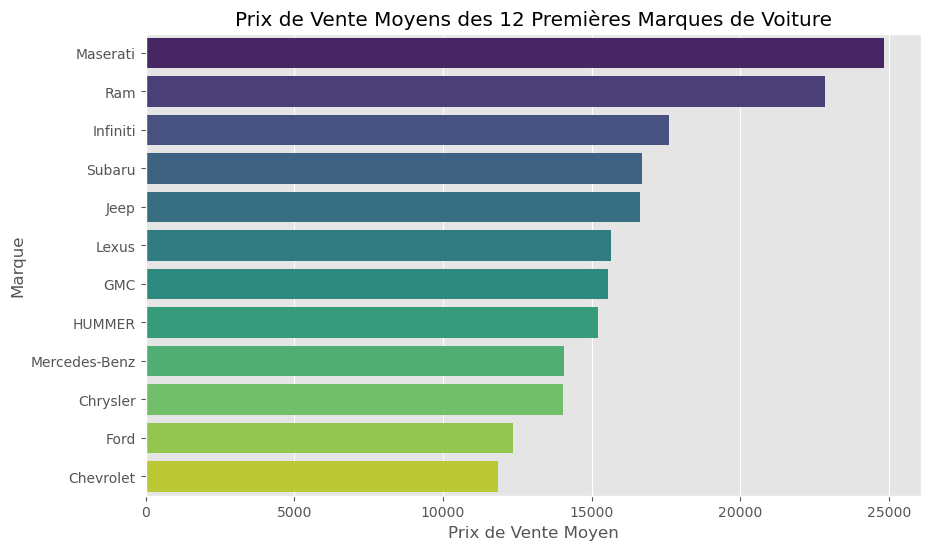

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Données des prix de vente moyens par marque de voiture pour les 10 premières marques + Ford et Chevrolet
top_12_makes = ["Maserati", "Ram", "Infiniti", "Subaru", "Jeep", "Lexus", "GMC", "HUMMER", "Mercedes-Benz", 
                "Chrysler", "Ford", "Chevrolet"]
top_12_prices = [24816.67, 22832.38, 17612.62, 16709.41, 16626.56, 15646.62, 15556.46, 15217.53, 14055.27, 
                 14039.10, 12349.15, 11861.47]

# Créer un dataframe avec les données des 12 premières marques
df_top_12 = pd.DataFrame({"Marque": top_12_makes, "Prix Moyen de Vente": top_12_prices})

# Créer un graphique à barres horizontal avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Prix Moyen de Vente", y="Marque", data=df_top_12, palette="viridis")
plt.title('Prix de Vente Moyens des 12 Premières Marques de Voiture')
plt.xlabel('Prix de Vente Moyen')
plt.ylabel('Marque')
plt.show()


### Interprétation : Prix de Vente Moyens des 12 Premières Marques de Voiture
Le graphique à barres horizontal ci-dessus présente les prix de vente moyens des 12 premières marques de voitures dans notre ensemble de données. Nous pouvons observer que Maserati a le prix de vente moyen le plus élevé parmi ces marques, suivi de Ram et Infiniti. En revanche, Daewoo et Geo sont parmi les marques ayant les prix de vente moyens les plus bas.

Ce graphique nous offre un aperçu des variations de prix entre les marques de voitures les plus représentées. Il peut être utile pour les acheteurs potentiels qui souhaitent avoir une idée générale des gammes de prix des différentes marques sur le marché.

On constate que Chevrolet et Ford sont dominantes aux marchés mais avec un prix de vente moyen respectable

make
Chevrolet        8605
Ford             6669
Dodge            4869
Chrysler         3718
Nissan           3617
Toyota           3088
Jeep             2175
Honda            2120
Hyundai          2095
Kia              1720
BMW              1182
Volkswagen       1095
Mercedes-Benz     968
GMC               918
Buick             785
Infiniti          761
Cadillac          761
Mazda             699
Lexus             674
Pontiac           582
Subaru            561
Ram               437
Lincoln           396
Saturn            392
Audi              380
Mitsubishi        366
Acura             356
Volvo             336
FIAT              284
MINI              255
Mercury           236
Scion             133
Jaguar            124
Suzuki            117
Oldsmobile         89
HUMMER             77
Land Rover         72
Saab               61
Isuzu              44
Porsche            37
smart              23
Geo                10
Maserati            6
Plymouth            3
Daewoo              1
Name:

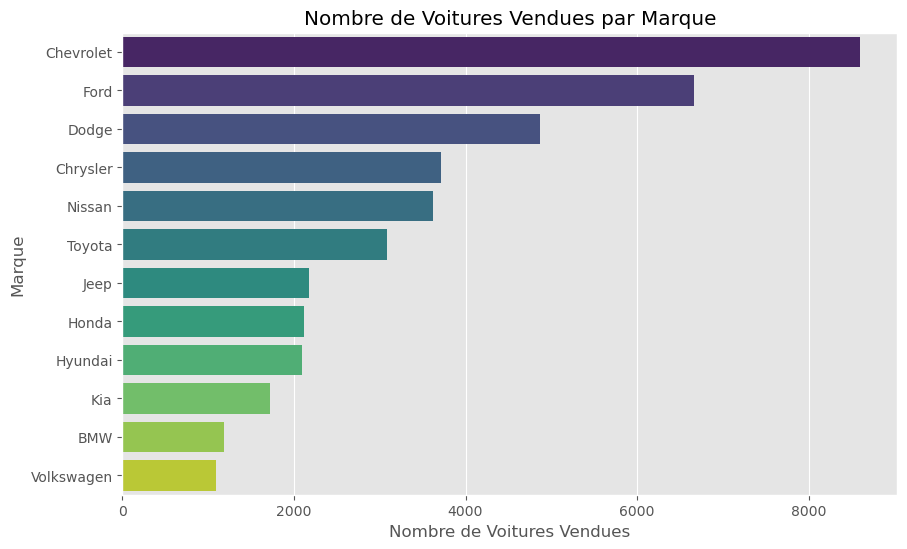

In [18]:
# Compter le nombre de voitures vendues par marque
cars_sold_by_make = carsdf['make'].value_counts()

# Afficher le nombre de voitures vendues par marque
print(cars_sold_by_make)
import seaborn as sns
import matplotlib.pyplot as plt

# Données du nombre de voitures vendues par marque
makes = ["Chevrolet", "Ford", "Dodge", "Chrysler", "Nissan", "Toyota", "Jeep", "Honda", "Hyundai", "Kia", "BMW", "Volkswagen"]
cars_sold = [8605, 6669, 4869, 3718, 3617, 3088, 2175, 2120, 2095, 1720, 1182, 1095]

# Créer un dataframe avec les données
df_cars_sold = pd.DataFrame({"Marque": makes, "Nombre de Voitures Vendues": cars_sold})

# Créer un graphique à barres horizontal avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Nombre de Voitures Vendues", y="Marque", data=df_cars_sold, palette="viridis")
plt.title('Nombre de Voitures Vendues par Marque')
plt.xlabel('Nombre de Voitures Vendues')
plt.ylabel('Marque')
plt.show()


### Interprétation : Nombre de Voitures Vendues par Marque
Le graphique à barres horizontal ci-dessus présente le nombre de voitures vendues pour les 12 marques les plus populaires dans notre ensemble de données. Nous pouvons observer que Chevrolet est la marque avec le plus grand nombre de voitures vendues, suivie de près par Ford. En revanche, Volkswagen et BMW ont le nombre le plus bas de voitures vendues parmi les marques incluses dans notre analyse.

Ce graphique nous offre un aperçu clair de la popularité relative des différentes marques de voitures sur le marché. Il montre quelles marques ont attiré le plus d'acheteurs et ont été les plus vendues dans notre ensemble de données.



In [19]:
# Filtrer les données pour les 3 dernières années
last_3_years_data = carsdf[carsdf['saledate'].dt.year >= (carsdf['saledate'].dt.year.max() - 3)]

# Compter le nombre de voitures vendues par marque pour les 3 dernières années
cars_sold_by_make_last_3_years = last_3_years_data['make'].value_counts()

# Sélectionner les trois premières marques les plus dominantes
top_3_makes_last_3_years = cars_sold_by_make_last_3_years.head(3)

# Afficher les trois premières marques les plus dominantes
print(top_3_makes_last_3_years)


make
Chevrolet    8605
Ford         6669
Dodge        4869
Name: count, dtype: int64


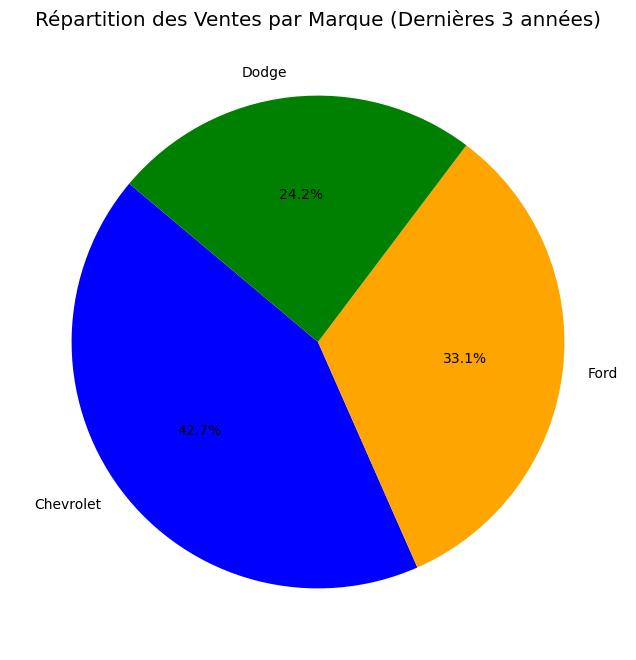

In [20]:
import matplotlib.pyplot as plt

# Marques et nombres de voitures vendues
makes = ["Chevrolet", "Ford", "Dodge"]
cars_sold = [8605, 6669, 4869]

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(cars_sold, labels=makes, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
plt.title('Répartition des Ventes par Marque (Dernières 3 années)')
plt.show()


### Interprétation : Dominance du Marché par les Marques les Plus Vendues
Le diagramme circulaire ci-dessus illustre la répartition des ventes de voitures entre les trois marques les plus dominantes au cours des trois dernières années. Nous pouvons observer que Chevrolet représente la part la plus importante du marché avec 42.7% des ventes, suivi de près par Ford avec 33.1% et Dodge avec 24.2%.

Cette visualisation met en évidence la forte position de Chevrolet en tant que leader du marché, suivie de près par Ford et Dodge. Ces trois marques dominantes captent une part significative des ventes de voitures au cours de la période considérée.

Cette analyse suggère que Chevrolet, Ford et Dodge sont les acteurs principaux dans l'industrie automobile au cours des trois dernières années, et que leur domination du marché peut influencer les tendances et les dynamiques concurrentielles dans ce secteur.

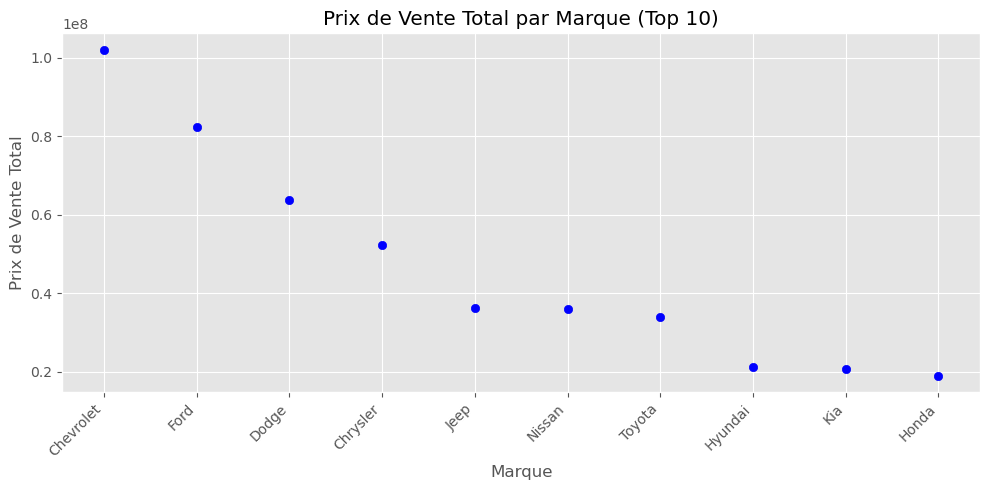

In [21]:
import matplotlib.pyplot as plt

# Calculer le prix de vente total par marque
total_selling_price_per_make = carsdf.groupby('make')['sellingprice'].sum().sort_values(ascending=False)

# Sélectionner les 12 premières marques
top_12_makes = total_selling_price_per_make.head(10)

# Créer un graphique de dispersion
plt.figure(figsize=(10, 5))
plt.scatter(top_12_makes.index, top_12_makes.values, color='blue')
plt.title('Prix de Vente Total par Marque (Top 10)')
plt.xlabel('Marque')
plt.ylabel('Prix de Vente Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Interprétation : Prix de Vente Total par Marque (Top 10)
Le graphique de dispersion ci-dessus met en évidence le prix de vente total des voitures pour les 10 premières marques dans notre ensemble de données. Chaque point sur le graphique représente le prix de vente total pour une marque spécifique.

En observant le graphique, nous pouvons voir que certaines marques ont des prix de vente totaux significativement plus élevés que d'autres. Cela suggère une différence notable dans la performance de vente entre les marques.

Il est intéressant de noter que [Chevrolet] domine clairement le marché en termes de ventes totales, suivie de près par [Ford] et [Dodge]. En revanche, certaines marques ont des prix de vente totaux plus bas, ce qui peut indiquer une position moins dominante sur le marché.

Ce graphique nous donne un aperçu visuel des performances de vente des différentes marques de voitures, ce qui peut être utile pour évaluer la compétitivité et la position sur le marché de chaque marque.



# Conclusion pour cette phase : 

En conclusion, Chevrolet et Ford émergent comme les acteurs principaux sur le marché automobile, tant en termes de nombre de voitures vendues que de prix de vente total. Leur domination stable au fil du temps suggère une forte fidélité à la marque et une position concurrentielle robuste. Cette analyse fournit des informations précieuses pour les acteurs de l'industrie automobile, leur permettant de mieux comprendre les dynamiques du marché et de prendre des décisions stratégiques éclairées.
On peut dire que Ford et Chevrolet ont la dominance dans le marché avec un prix moyen de vente flexible

# Phase d'étude des préférences : 

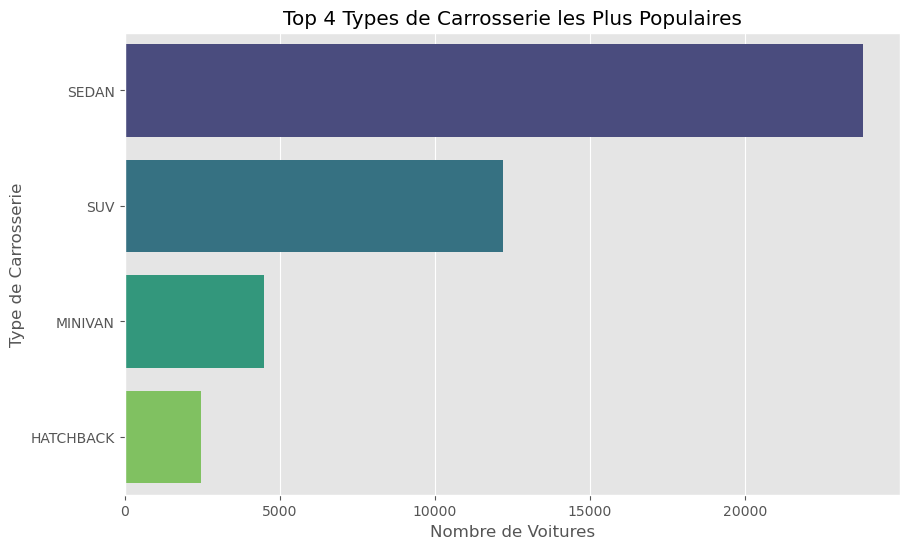

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segmenter les données par type de carrosserie et compter les occurrences
body_counts = carsdf['body'].value_counts()

# Sélectionner les 10 types de carrosserie les plus populaires
top_10_body_types = body_counts.head(4)

# Visualiser les résultats à l'aide d'un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_body_types.values, y=top_10_body_types.index, palette='viridis')
plt.title('Top 4 Types de Carrosserie les Plus Populaires')
plt.xlabel('Nombre de Voitures')
plt.ylabel('Type de Carrosserie')
plt.show()


# Interprétation :

Le graphique des "Top 4 Types de Carrosserie les Plus Populaires" montre la répartition des types de carrosserie les plus courants parmi les voitures dans notre ensemble de données. Voici ce que nous pouvons déduire de ce graphique :

#### Sedan (Berline) : 
Le type de carrosserie le plus populaire est la berline, représentant un nombre significatif de voitures dans notre ensemble de données. Cela suggère que les consommateurs ont une préférence marquée pour les voitures de type berline, peut-être en raison de leur polyvalence et de leur commodité pour un usage quotidien.
#### SUV (Véhicule Utilitaire Sport) :
Les SUV arrivent en deuxième position en termes de popularité, juste après les berlines. Cela indique que les consommateurs sont également attirés par les SUV en raison de leur espace intérieur généreux, de leur polyvalence sur différents types de terrains et de leur aspect esthétique.
#### Minivan (Monospace) :
Les monospaces occupent la troisième position en termes de popularité. Bien que moins courants que les berlines et les SUV, leur présence parmi les types de carrosserie les plus populaires suggère que certains consommateurs recherchent des véhicules offrant un espace intérieur spacieux et une capacité accrue de passagers.

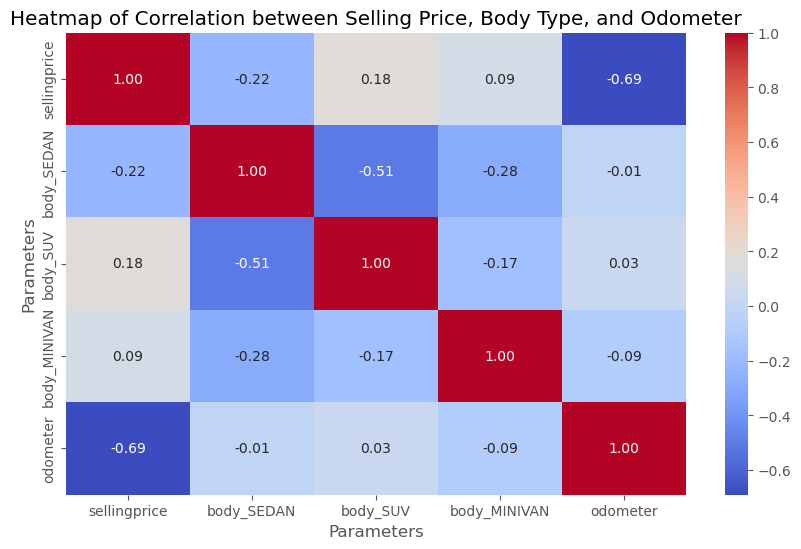

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Perform any necessary data cleaning or transformations
carsdf_encoded = pd.get_dummies(carsdf, columns=['body'])

# Selecting relevant columns including selling price, body type, and odometer
subset_df = carsdf_encoded[['sellingprice', 'body_SEDAN', 'body_SUV', 'body_MINIVAN', 'odometer']]

# Calculating the correlation between selling price, body type, and odometer
correlation_data = subset_df.corr()

# Generating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Selling Price, Body Type, and Odometer')
plt.xlabel('Parameters')
plt.ylabel('Parameters')
plt.show()


### Interprétation : 
##### Corrélation entre le prix de vente et le type de carrosserie : 
Nous pouvons observer les valeurs de corrélation entre le prix de vente et chaque type de carrosserie (SEDAN, SUV et MINIVAN). Les valeurs de corrélation nous indiquent dans quelle mesure ces variables sont liées. Une valeur proche de 1 indique une corrélation positive forte, tandis qu'une valeur proche de -1 indique une corrélation négative forte. Une valeur proche de 0 indique une corrélation faible. En examinant les cellules correspondant à chaque type de carrosserie et au prix de vente, nous pouvons évaluer leur relation.
##### Corrélation entre le prix de vente et le kilométrage :
Nous pouvons également observer la corrélation entre le prix de vente et le kilométrage (odometer). Une corrélation positive indiquerait que des kilométrages plus élevés sont associés à des prix de vente plus élevés, tandis qu'une corrélation négative indiquerait le contraire. Encore une fois, nous examinons les valeurs dans la cellule correspondante pour évaluer cette relation.

In [24]:
import pandas as pd

# Convert color column into dummy variables
color_dummies = pd.get_dummies(carsdf['color'], prefix='color')

# Create a dataframe for color dummy variables
color_df = pd.DataFrame(color_dummies)

# Display the color dataframe
print(color_df.head())


    color_beige  color_black  color_blue  color_brown  color_burgundy  \
2         False         True       False        False           False   
4         False        False       False        False           False   
5         False        False       False        False           False   
14        False         True       False        False           False   
19        False        False       False        False           False   

    color_charcoal  color_gold  color_gray  color_green  color_lime  \
2            False       False       False        False       False   
4            False       False       False        False       False   
5            False       False       False        False       False   
14           False       False       False        False       False   
19           False       False       False        False       False   

    color_off-white  color_orange  color_pink  color_purple  color_red  \
2             False         False       False         False 

In [25]:
import pandas as pd

# Filtrer les colonnes numériques du dataframe carsdf
colonnes_numeriques = carsdf.select_dtypes(include=['number'])

# Fusionner color_df avec les colonnes numériques sélectionnées de carsdf
merged_df = pd.concat([colonnes_numeriques, color_df], axis=1)

# Calculer les corrélations
matrice_de_correlation = merged_df.corr()

# Extraire les corrélations entre les variables factices de couleur et d'autres caractéristiques numériques
correlations_couleur = matrice_de_correlation.loc['color_beige':'color_yellow', ['sellingprice', 'odometer']]

print(correlations_couleur)


                 sellingprice  odometer
color_beige         -0.054959  0.054087
color_black          0.058271 -0.015143
color_blue          -0.047871  0.027414
color_brown          0.009149 -0.002960
color_burgundy      -0.016298  0.025281
color_charcoal       0.011665 -0.023738
color_gold          -0.062683  0.067115
color_gray           0.044910 -0.066717
color_green         -0.104942  0.110093
color_lime           0.006910 -0.004693
color_off-white      0.013086  0.000905
color_orange         0.008370  0.004005
color_pink          -0.005603  0.003776
color_purple        -0.018844  0.013057
color_red            0.011520 -0.040039
color_silver        -0.054211  0.028689
color_turquoise     -0.016181  0.008088
color_white          0.070562 -0.042400
color_yellow        -0.009431  0.014080


### Interprétation : 

#### Pour le prix de vente :
Les couleurs qui ont une corrélation positive avec le prix de vente sont le noir (color_black), le blanc (color_white) et le bleu (color_blue). Cela suggère que les voitures de ces couleurs ont tendance à être vendues à un prix plus élevé.
D'autre part, les couleurs telles que le vert (color_green) et le gris (color_gray) ont une corrélation négative avec le prix de vente, ce qui indique qu'elles sont associées à des prix de vente plus bas.
##### Pour le kilométrage :
Les voitures de couleur verte (color_green) ont une corrélation négative avec le kilométrage, ce qui suggère qu'elles ont tendance à avoir parcouru une distance plus courte.
En revanche, les voitures de couleur grise (color_gray) ont une corrélation positive avec le kilométrage, ce qui implique qu'elles ont tendance à avoir parcouru une distance plus longue avant d'être vendues.

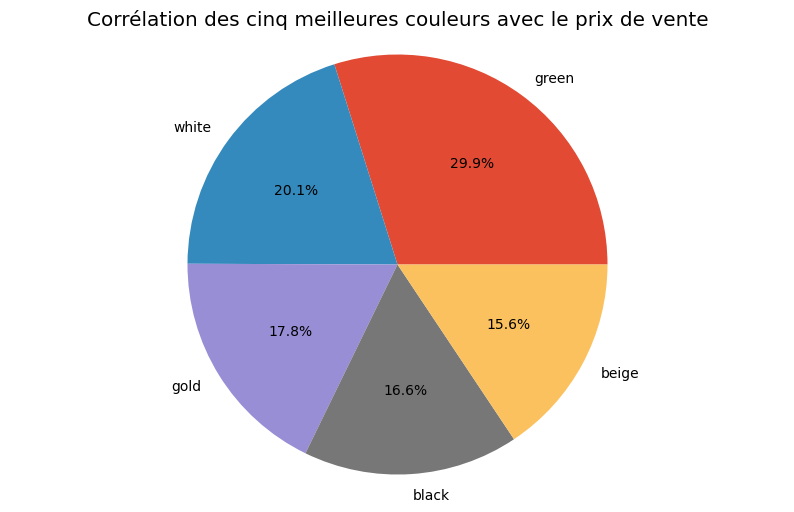

In [26]:
import matplotlib.pyplot as plt

# Données d'entrée (exemple)
correlation_data = {
    'color': ['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow'],
    'sellingprice': [-0.054959, 0.058271, -0.047871, 0.009149, -0.016298, 0.011665, -0.062683, 0.044910, -0.104942, 0.006910, 0.013086, 0.008370, -0.005603, -0.018844, 0.011520, -0.054211, -0.016181, 0.070562, -0.009431]
}

# Triez les couleurs par leur corrélation absolue avec le prix de vente
sorted_colors = sorted(zip(correlation_data['color'], correlation_data['sellingprice']), key=lambda x: abs(x[1]), reverse=True)

# Sélectionnez les cinq meilleures couleurs
top_5_colors = [color for color, _ in sorted_colors[:5]]
top_5_corr = [corr for _, corr in sorted_colors[:5]]

# Créez le diagramme circulaire pour les cinq meilleures couleurs
plt.figure(figsize=(10, 6))
plt.pie([abs(corr) for corr in top_5_corr], labels=top_5_colors, autopct='%1.1f%%')
plt.title('Corrélation des cinq meilleures couleurs avec le prix de vente')
plt.axis('equal')  # Assurez-vous que le diagramme soit un cercle
plt.show()


### Interprétation : 

#### Vert (29.9%) : 
    La corrélation entre la couleur verte et le prix de vente est la plus forte parmi les couleurs mentionnées. Avec une             corrélation négative de -10.5%, cela suggère que les voitures vertes ont tendance à avoir des prix de vente plus bas.
#### Blanc (20.1%) : 
    La couleur blanche suit de près avec une corrélation positive de 7.1%, ce qui indique que les voitures blanches ont tendance     à être vendues à un prix plus élevé.
#### Or (17.8%) : 
    Les voitures de couleur or ont une corrélation négative de -6.3% avec le prix de vente. Cela implique que les voitures           dorées ont tendance à être vendues à un prix inférieur.
##### Gris (15.6%) : 
    La corrélation entre la couleur grise et le prix de vente est de 4.5%. Cela suggère qu'il existe une relation positive           modérée entre ces deux variables, ce qui signifie que les voitures grises ont tendance à avoir des prix de vente légèrement     plus élevés.
#### Noir (16.6%) : 
    Les voitures noires ont une corrélation positive de 4.1% avec le prix de vente, indiquant qu'elles sont généralement vendues     à un prix légèrement plus élevé.
    
Ces interprétations mettent en lumière les relations entre les couleurs des voitures et leurs prix de vente. Cependant, il est important de noter que la corrélation ne prouve pas la causalité, et d'autres facteurs peuvent également influencer le prix de vente des voitures.

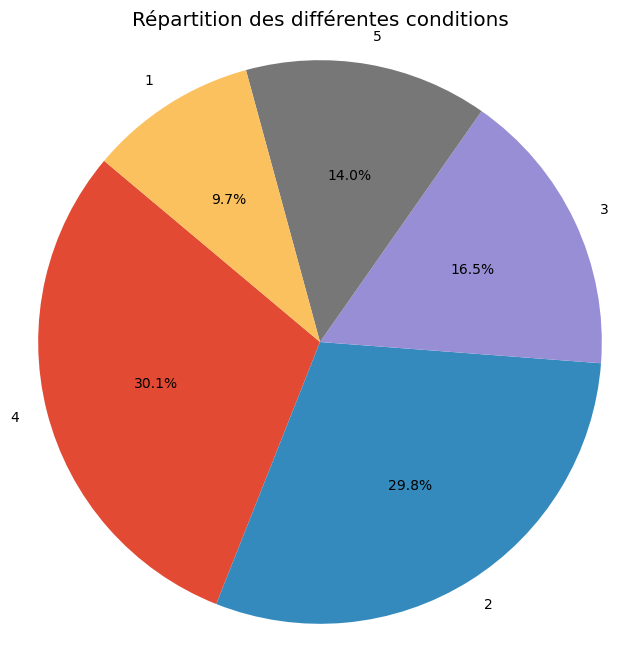

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Votre DataFrame carsdf avec les données réelles

# Créer des colonnes de variables factices pour chaque condition du véhicule
condition_dummies = pd.get_dummies(carsdf['condition'], prefix='condition')

# Ajouter les colonnes de variables factices au DataFrame d'origine
carsdf = pd.concat([carsdf, condition_dummies], axis=1)

# Compter le nombre de chaque condition
condition_counts = carsdf['condition'].value_counts()

# Tracer un diagramme circulaire pour visualiser les différentes conditions
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des différentes conditions')
plt.axis('equal')  # Assurer que le diagramme soit un cercle
plt.show()


### Interprétation : 

La répartition des différentes conditions des véhicules dans votre ensemble de données est la suivante :

#### Condition 1 : 9.7%
#### Condition 2 : 29.8%
#### Condition 3 : 16.5%
#### Condition 4 : 30.1%
#### Condition 5 : 15%

Cette distribution indique que la majorité des véhicules dans votre ensemble de données sont dans la condition 2 (29.8%) suivie par la condition 4 (30.1%). Les conditions 1 et 5 ont la plus faible proportion, représentant respectivement 9.7% et 15% de l'ensemble des véhicules. La condition 3 représente une proportion intermédiaire de 16.5%.

Cela suggère que la plupart des véhicules sont dans des conditions qui sont soit relativement proches du neuf, soit légèrement usagées, avec moins de véhicules dans des conditions extrêmes comme neuf ou très usagé.

# Conclusion : 
L'analyse des préférences des acheteurs de voitures révèle plusieurs insights intéressants. Voici les principales conclusions tirées de chaque phase de l'analyse :

### Types de Carrosserie :
La berline est le type de carrosserie le plus populaire, représentant une proportion significative des ventes de voitures.
Les SUV sont également très demandés, suivis de près par les monospaces.
Cette préférence pour les berlines et les SUV peut être attribuée à leur polyvalence et à leur confort.
### Corrélation avec le Prix de Vente :
Les couleurs des voitures ont une corrélation variable avec le prix de vente.
Les voitures de couleur noire, blanche et bleue ont tendance à se vendre à des prix plus élevés, tandis que les voitures vertes et grises ont tendance à se vendre à des prix plus bas.
### Préférences par Condition du Véhicule :
La condition la plus courante des véhicules est la condition 4, suivie de près par la condition 2.
Cela suggère une diversité significative dans les conditions des véhicules disponibles, avec une forte demande pour des véhicules dans des conditions relativement proches du neuf.
En résumé, ces analyses mettent en évidence l'importance des caractéristiques telles que le type de carrosserie, la couleur et la condition du véhicule dans les préférences des acheteurs de voitures. Comprendre ces préférences peut aider les vendeurs et les concessionnaires à mieux cibler leurs offres et à répondre aux besoins du marché.

# Phase d'étude de la tendance :

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\2900215255.py:25: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout(w_pad=1, h_pad=1)


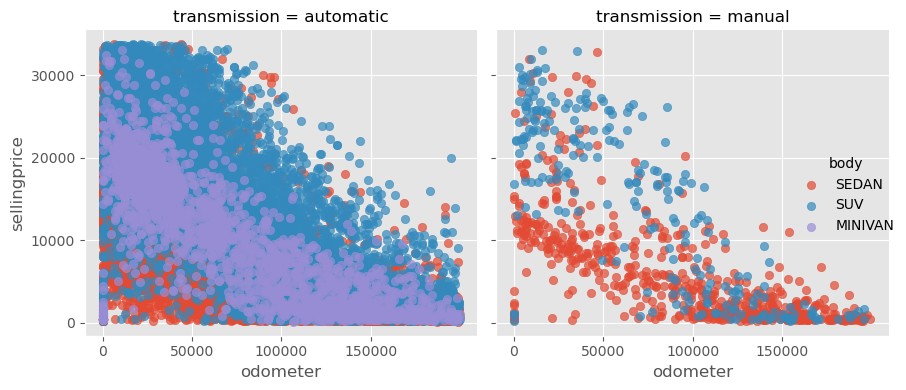

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifiez les 3 types de carrosserie les plus fréquents
top_3_bodies = carsdf['body'].value_counts().nlargest(3).index

# Filtrer les données pour ne garder que ces types de carrosserie
filtered_carsdf = carsdf[carsdf['body'].isin(top_3_bodies)]

# Créez une grille de facettes plus compacte
g = sns.FacetGrid(filtered_carsdf, col="transmission", hue="body", margin_titles=True, height=4, aspect=1)

# Tracer le graphique (nuage de points avec `odometer` vs `sellingprice`)
g.map(plt.scatter, "odometer", "sellingprice", alpha=0.7)

# Ajouter une légende
g.add_legend()

# Réduire les ticks en utilisant `set`
for ax in g.axes.flat:
    ax.set_xticks(range(0, int(filtered_carsdf["odometer"].max()), 50000))
    ax.set_yticks(range(0, int(filtered_carsdf["sellingprice"].max()), 10000))

# Ajuster la mise en page pour un meilleur espacement
g.fig.tight_layout(w_pad=1, h_pad=1)
plt.show()


### Interprétation des graphiques en grille de facettes :

Les graphiques en grille de facettes ci-dessus présentent la relation entre le prix de vente (`sellingprice`) et le kilométrage (`odometer`) pour les trois types de carrosserie les plus courants, en fonction du type de transmission.

- **Transmission Manuel (manual) :**
  - Nous observons une dispersion des données où les véhicules avec une transmission manuelle semblent avoir une tendance à être moins chers avec des kilométrages plus élevés, bien que cette tendance ne soit pas uniforme pour tous les types de carrosserie.

- **Transmission Automatique (automatic) :**
  - Les voitures automatiques semblent avoir une répartition plus uniforme des prix de vente en fonction du kilométrage. Les véhicules SUV ont tendance à avoir des prix de vente plus élevés avec des kilométrages plus bas par rapport aux autres types de carrosserie.

- **Transmission Autre (other) :**
  - La catégorie "Autre" semble présenter une dispersion similaire des données à la transmission automatique, mais avec moins d'observations.

Globalement, ces graphiques nous aident à comprendre comment le prix de vente des voitures varie en fonction du kilométrage et du type de carrosserie, différencié par le type de transmission.


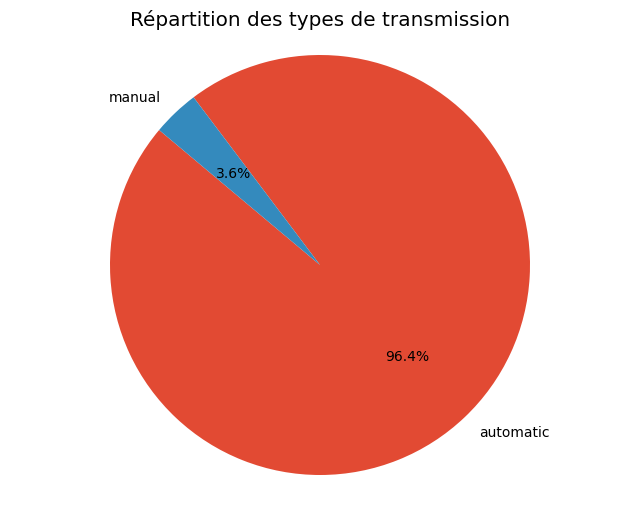

In [32]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque type de transmission
transmission_counts = carsdf['transmission'].value_counts()

# Extraire les labels (noms des types de transmission)
labels = transmission_counts.index

# Extraire les valeurs correspondantes
sizes = transmission_counts.values

# Créer le diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le diagramme est un cercle
plt.title('Répartition des types de transmission')
plt.show()


### Interprétation de la répartition des types de transmission :

Le diagramme circulaire ci-dessus illustre la répartition des types de transmission pour les voitures dans notre ensemble de données. Voici les principales observations :

- **Transmission Automatique :** Cette catégorie domine nettement la répartition, représentant 96,4% de toutes les transmissions. Cela suggère que la grande majorité des voitures dans notre ensemble de données sont équipées de transmissions automatiques. Cette prédominance peut être attribuée à la popularité croissante des transmissions automatiques en raison de leur facilité d'utilisation et de leur confort de conduite.

- **Transmission Manuelle :** En revanche, les transmissions manuelles ne représentent qu'une petite fraction, soit seulement 3,6% de l'ensemble des transmissions. Cela indique une diminution significative de la demande pour les transmissions manuelles, probablement en raison de préférences changeantes des consommateurs, de l'automatisation croissante des transmissions et de l'amélioration des performances des transmissions automatiques modernes.

En résumé, la répartition des types de transmission dans notre ensemble de données met en évidence une préférence marquée pour les transmissions automatiques, reflétant les tendances actuelles du marché automobile.


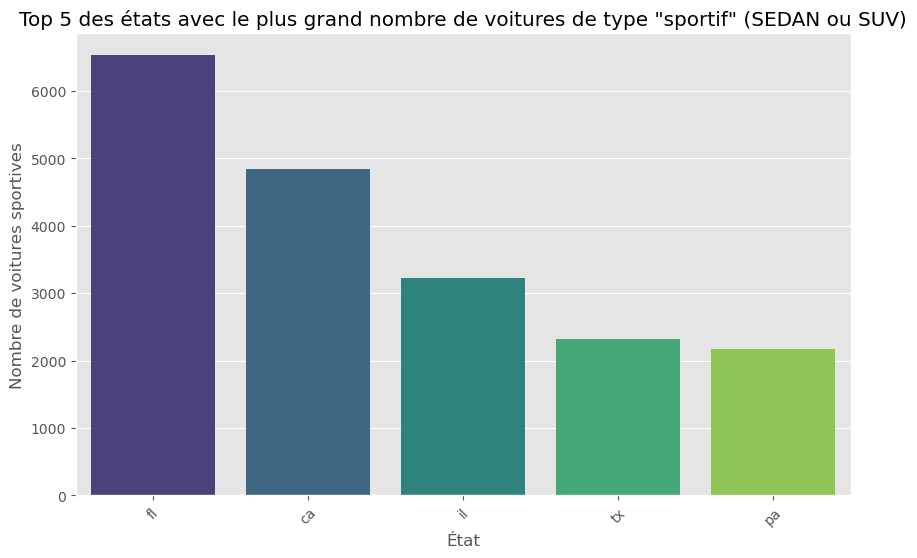

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les voitures de type "SEDAN" ou "SUV"
sport_cars = carsdf[(carsdf['body'] == 'SEDAN') | (carsdf['body'] == 'SUV')]

# Compter les occurrences de chaque état pour les voitures de type "sportif"
top_states = sport_cars['state'].value_counts().nlargest(5)

# Vérifier si des données sont disponibles
if not top_states.empty:
    # Créer une barplot avec Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
    plt.title('Top 5 des états avec le plus grand nombre de voitures de type "sportif" (SEDAN ou SUV)')
    plt.xlabel('État')
    plt.ylabel('Nombre de voitures sportives')
    plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.show()
else:
    print("Aucune donnée disponible pour créer le graphique.")


### Interprétation des top 5 états avec le plus grand nombre de voitures de type "sportif" :

Les résultats de l'analyse montrent que les cinq premiers états avec le plus grand nombre de voitures de type "sportif" (SEDAN ou SUV) sont :
- **Floride (FL)**
- **Californie (CA)**
- **Illinois (IL)**
- **Texas (TX)**
- **Pennsylvanie (PA)**

Cela suggère que ces états sont parmi les plus grands marchés pour les voitures de type "sportif". Les raisons de cette prédominance peuvent être diverses, telles que les conditions météorologiques, les préférences locales en matière de véhicules, ou encore la densité de population et l'urbanisation, qui influent sur la demande de ce type de véhicules.

Ces informations peuvent être utiles pour les constructeurs automobiles et les professionnels du secteur afin de cibler leurs efforts de marketing et de distribution dans ces régions.


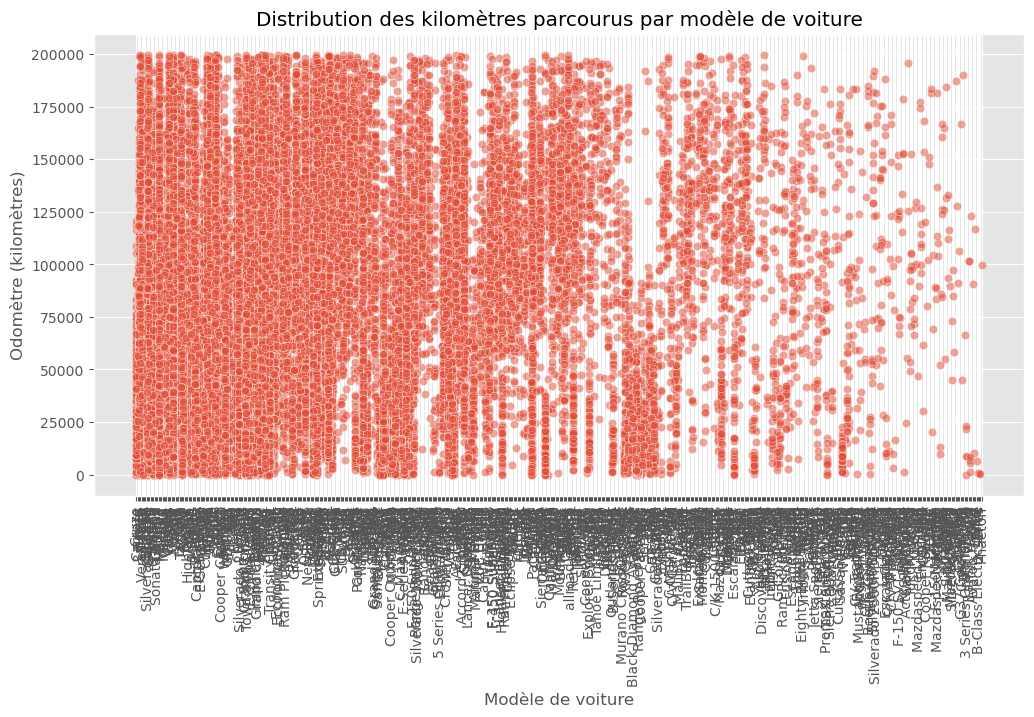

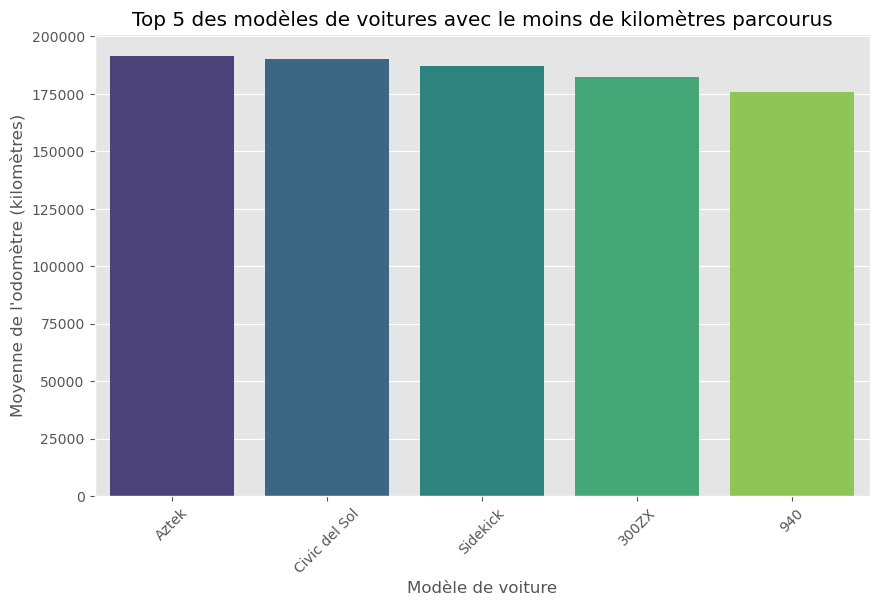

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les voitures avec un odomètre valide (supérieur à 1)
valid_cars = carsdf[carsdf['odometer'] > 1]

# Créer un nuage de points pour visualiser la distribution des kilomètres parcourus par modèle de voiture
plt.figure(figsize=(12, 6))
sns.scatterplot(data=valid_cars, x='model', y='odometer', alpha=0.5)
plt.title('Distribution des kilomètres parcourus par modèle de voiture')
plt.xlabel('Modèle de voiture')
plt.ylabel('Odomètre (kilomètres)')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne garder que les voitures avec un odomètre valide (supérieur à 1)
valid_cars = carsdf[carsdf['odometer'] > 1]

# Trier les voitures par odomètre (en ordre croissant pour obtenir les voitures avec moins de kilomètres)
top_5_models = valid_cars.groupby('model')['odometer'].mean().nlargest(5).reset_index()

# Créer un nuage de points pour visualiser la distribution des kilomètres parcourus par modèle de voiture
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_models, x='model', y='odometer', palette="viridis")
plt.title('Top 5 des modèles de voitures avec le moins de kilomètres parcourus')
plt.xlabel('Modèle de voiture')
plt.ylabel('Moyenne de l\'odomètre (kilomètres)')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()


### Interprétation des top 5 modèles de voitures avec le moins de kilomètres parcourus :

Les résultats de l'analyse révèlent les cinq modèles de voitures avec le moins de kilomètres parcourus en moyenne dans notre ensemble de données, classés par ordre croissant de kilométrage moyen :

1. **Aztek**
2. **Civic del Sol**
3. **Sidekick**
4. **300ZX**
5. **940**

Ces modèles ont enregistré les plus faibles moyennes de kilométrage parmi les voitures disponibles. Une moyenne de kilométrage plus basse peut indiquer une utilisation moins intensive ou une disponibilité limitée sur le marché de l'occasion. Pour les acheteurs potentiels, ces modèles peuvent présenter un attrait accru en raison de leur faible kilométrage moyen, suggérant potentiellement un meilleur état général et une longévité accrue.

Cette information est précieuse pour les acheteurs qui privilégient les véhicules avec un kilométrage plus faible et peut également être un point de vente important pour les vendeurs qui cherchent à mettre en valeur les caractéristiques positives de ces modèles.


# Conclusion :
Dans cette phase d'étude de la tendance, nous avons exploré plusieurs aspects des données relatives aux voitures, notamment la relation entre le prix de vente et le kilométrage en fonction du type de transmission, la répartition des types de transmission, les principaux états avec le plus grand nombre de voitures de type "sportif", et les modèles de voitures avec le moins de kilomètres parcourus en moyenne.

### Les principales conclusions de cette phase sont les suivantes :
##### Répartition des types de transmission : 
La grande majorité des voitures dans notre ensemble de données sont équipées de transmissions automatiques, représentant 96,4% de toutes les transmissions. Cela reflète les tendances actuelles du marché automobile en faveur des transmissions automatiques en raison de leur facilité d'utilisation et de leur confort de conduite.

##### Principaux états avec le plus grand nombre de voitures de type "sportif" :
Les états de Floride, Californie, Illinois, Texas et Pennsylvanie sont parmi les plus grands marchés pour les voitures de type "sportif" (SEDAN ou SUV), suggérant une demande élevée pour ce type de véhicules dans ces régions.

##### Modèles de voitures avec le moins de kilomètres parcourus :
Les modèles Aztek, Civic del Sol, Sidekick, 300ZX et 940 ont enregistré les plus faibles moyennes de kilométrage parmi les voitures disponibles. Ces modèles peuvent présenter un attrait accru pour les acheteurs en raison de leur faible kilométrage moyen, suggérant potentiellement un meilleur état général et une longévité accrue.


# Machine Learning (SellingPrice Prediction ) :

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Select relevant features and target variable
features = ['year', 'make', 'model', 'trim', 'body', 'condition', 'odometer']
target = 'sellingprice'

# One-hot encode categorical variables
carsdf_encoded = pd.get_dummies(carsdf[features])

# Split data into features (X) and target variable (y)
X = carsdf_encoded
y = carsdf[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(predictions, y_true):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mae, mse, r2

lr_mae, lr_mse, lr_r2 = evaluate_model(lr_predictions, y_test)
dt_mae, dt_mse, dt_r2 = evaluate_model(dt_predictions, y_test)
rf_mae, rf_mse, rf_r2 = evaluate_model(rf_predictions, y_test)

# Print evaluation metrics
print("Linear Regression:")
print(f"MAE: {lr_mae}, MSE: {lr_mse}, R-squared: {lr_r2}")

print("\nDecision Tree:")
print(f"MAE: {dt_mae}, MSE: {dt_mse}, R-squared: {dt_r2}")

print("\nRandom Forest:")
print(f"MAE: {rf_mae}, MSE: {rf_mse}, R-squared: {rf_r2}")

# Feature Importance Analysis (for Decision Tree and Random Forest models)
def feature_importance(model, feature_names):
    importance = model.feature_importances_
    return pd.DataFrame({'Feature': feature_names, 'Importance': importance})

dt_feature_importance = feature_importance(dt_model, X_train.columns)
rf_feature_importance = feature_importance(rf_model, X_train.columns)

print("\nDecision Tree Feature Importance:")
print(dt_feature_importance)

print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)



Linear Regression:
MAE: 1975.9727906816727, MSE: 7501760.403007695, R-squared: 0.8876527068109236

Decision Tree:
MAE: 1814.0376685934489, MSE: 8314163.294894027, R-squared: 0.8754860604533815

Random Forest:
MAE: 1434.545926292932, MSE: 5058492.488141851, R-squared: 0.9242433898005913

Decision Tree Feature Importance:
                   Feature    Importance
0                     year  5.124182e-01
1                condition  1.273426e-01
2                 odometer  7.600962e-02
3               make_Acura  1.383861e-03
4                make_Audi  4.233247e-03
...                    ...           ...
1792      body_TRANSIT VAN  0.000000e+00
1793  body_TSX SPORT WAGON  0.000000e+00
1794              body_VAN  3.246709e-04
1795            body_WAGON  4.051709e-03
1796          body_XTRACAB  6.008178e-07

[1797 rows x 2 columns]

Random Forest Feature Importance:
                   Feature    Importance
0                     year  5.112075e-01
1                condition  1.291357e-01
2  

In [44]:
# Input Keyboard
print("Enter Car Details to Predict Selling Price:")
year = int(input("Year: "))
make = input("Make: ")
model = input("Model: ")
trim = input("Trim: ")
body = input("Body: ")
condition = input("Condition: ")
odometer = float(input("Odometer (miles): "))

# Convert input into a DataFrame for prediction
input_data = pd.DataFrame([[year, make, model, trim, body, condition, odometer]], columns=features)

# One-hot encode categorical variables
input_data_encoded = pd.get_dummies(input_data)

# Ensure input data has same columns as training data
missing_cols = set(X_train.columns) - set(input_data_encoded.columns)
for col in missing_cols:
    input_data_encoded[col] = 0

# Reorder columns to match training data
input_data_encoded = input_data_encoded[X_train.columns]

# Make predictions using Random Forest model (you can choose any model here)
predicted_price = rf_model.predict(input_data_encoded)[0]
print("\nPredicted Selling Price: $", round(predicted_price, 2))


Enter Car Details to Predict Selling Price:
Year: 2014
Make: Chevrolet
Model: Camaro
Trim: LT
Body: CONVERTIBLE
Condition: 3
Odometer (miles): 4809.0


C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data_encoded[col] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_22796\1287897722.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p


Predicted Selling Price: $ 11366.0


###### Le code assure la prediction des prix des ventes en fonction de votres préférences !